# Fitting capillary pressure to centrifuge data

In [3]:
# read the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('..')
import pymadreq.coreflood as cf

# read the data
df = pd.read_csv('pc_data_chalk_sw.csv')
sns.set_style('whitegrid')


c:\Users\aliak\venvs\myfvm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aliak\venvs\myfvm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


[Text(0.5, 0, 'Water saturation'), Text(0, 0.5, 'Capillary pressure (kPa)')]

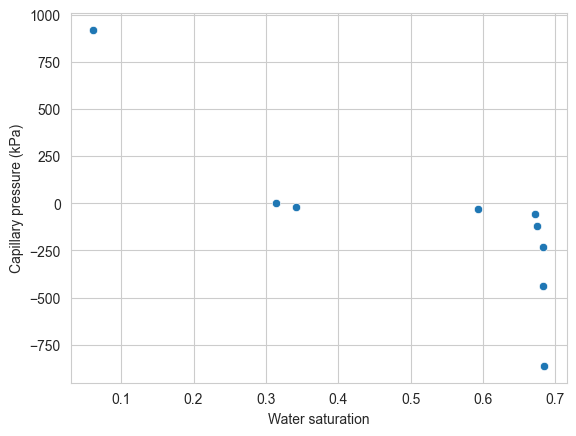

In [4]:
pc_plot = sns.scatterplot(df, x='sw', y='pc')
pc_plot.set(xlabel='Water saturation', ylabel='Capillary pressure (kPa)')

Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
pc_hm      5e+04     5000    5e+04     None     True     None     None
pc_lm     -5e+04   -5e+05   -5e+04     None     True     None     None
pc_max  9.193e+05    8e+04    2e+06     None    False     None     None
pc_min  -8.621e+05   -1e+06   -6e+04     None    False     None     None
sw_pc0    0.3144      0.3      0.6     None    False     None     None


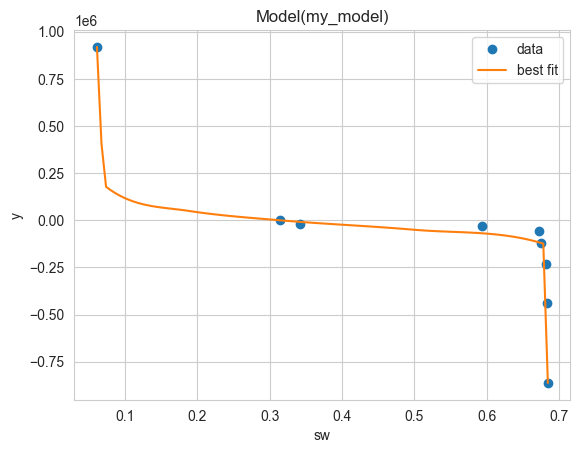

In [96]:
from lmfit import Parameters, Model

swc = df['sw'].min()
sor = 1-df['sw'].max()

def my_model(sw, sw_pc0, pc_lm, pc_hm, pc_min, pc_max):
    pc = cf.CapillaryPressurePiecewise(
        sw_pc0= sw_pc0,
        pce= 5e5,
        sorting_factor= 2.0,
        pc_min= pc_min,
        pc_max= pc_max,
        pc_lm= pc_lm,
        pc_hm= pc_hm,
        swc= swc,
        sor= sor,
        extrap_factor= 200.0,
        curve_factor_l= 30.0,
        curve_factor_h= 10.0)
    return pc.pc_imb(sw)
    
model = Model(my_model)

params = Parameters()
params.add('sw_pc0', value=df['sw'][df['pc']==0].values[0], min=0.3, max=0.6, vary=False)
params.add('pc_lm', value=-1e4, min=-5e5, max=-5e4, vary=True)
params.add('pc_hm', value=2e4, min=5e3, max=5e4)
params.add('pc_min', value=1000*df['pc'].min(), min=-1e6, max=-6e4, vary=False)
params.add('pc_max', value=1000*df['pc'].max(), min=8e4, max=2e6, vary=False)

result = model.fit(1000*df['pc'].to_numpy(), params, sw=df['sw'].to_numpy(), verbose=2, method='nelder')
result.plot_fit(numpoints=100, datafmt='o', fitfmt='-')
result.params.pretty_print()

In [93]:
swc, sor

(0.0611322835411835, 0.3154697468498129)

0.3143732870603116